In [9]:
# Load and display the first few rows of the uploaded Automobile_data.csv to understand its structure.
import pandas as pd

# Load the dataset
dataset_path = '/content/Automobile_data.csv'
auto_data = pd.read_csv(dataset_path)

# Display the first few rows to understand the structure
auto_data.head()


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


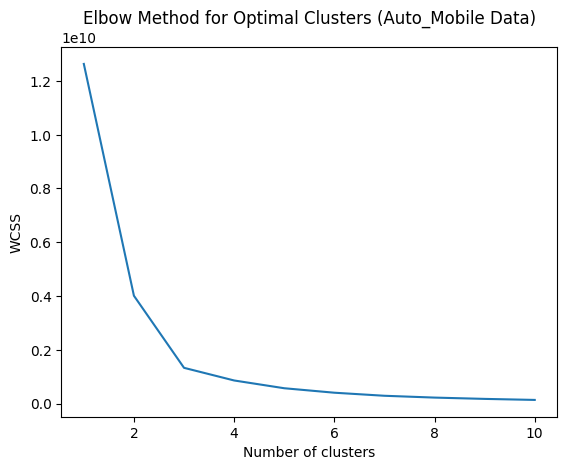

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Select the columns 'engine-size' and 'price' for clustering. Handle missing or non-numeric values.
auto_data = auto_data.replace('?', np.nan)
auto_data[['engine-size', 'price']] = auto_data[['engine-size', 'price']].apply(pd.to_numeric, errors='coerce')

# Drop rows with NaN values in 'engine-size' or 'price' for clustering purposes
auto_data = auto_data.dropna(subset=['engine-size', 'price'])
X = auto_data[['engine-size', 'price']].values

# Use the elbow method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plotting the elbow method results
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method for Optimal Clusters (Auto_Mobile Data)')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


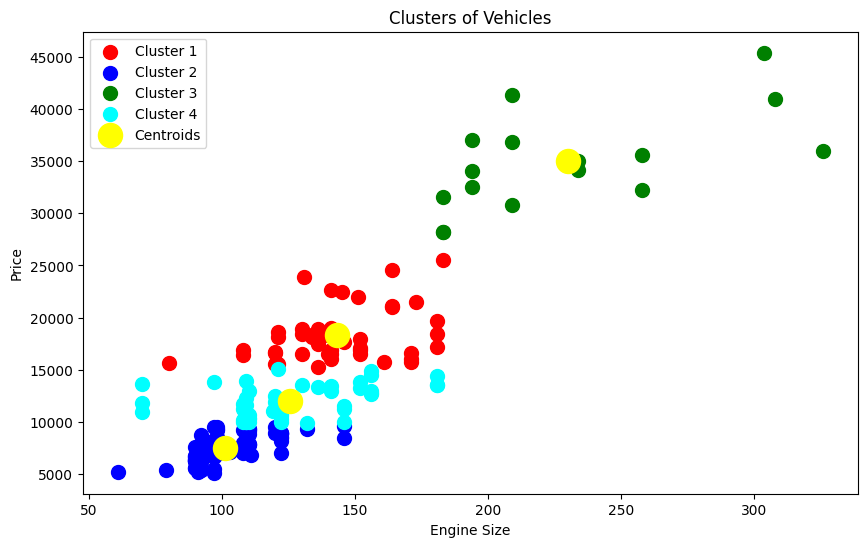

In [11]:
# Applying KMeans clustering with the selected number of clusters (4)
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X)

# Visualizing the clusters
plt.figure(figsize=(10, 6))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s=100, c='cyan', label='Cluster 4')

# Plotting the centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')
plt.title('Clusters of Vehicles')
plt.xlabel('Engine Size')
plt.ylabel('Price')
plt.legend()
plt.show()
